In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
# Load the dataset from the Excel file
file_path = "/content/Impact_Dataset.xlsx"
# Read the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)
# Display the first few rows to understand the structure
df.head()

,Al (%),Ni (%),Cr (%),Fe (%),Co (%),delKE (aJ)
0,18.963246,20.624046,15.940016,21.791448,22.681244,283.850000
1,34.724962,19.981594,15.097815,15.097815,15.097815,296.089423
2,31.446805,22.440236,15.370986,15.370986,15.370986,315.630284
3,34.150364,20.002932,15.282235,15.282235,15.282235,316.350000
4,17.807636,20.752933,15.591557,22.496968,23.350905,344.820000


In [ ]:
# Define features (X) and targets (Y1 for E, Y2 for rho)
X = df[['Al (%)', 'Ni (%)', 'Cr (%)', 'Fe (%)', 'Co (%)']]
y = df['delKE (aJ)']

In [ ]:
# prompt: Concatenate X and y

import pandas as pd
# Concatenate X and y along columns (axis=1)
Xy = pd.concat([X, y], axis=1)

# Display the first few rows of the concatenated DataFrame
print(Xy.head())


      Al (%)     Ni (%)     Cr (%)     Fe (%)     Co (%)  delKE (aJ)
0  18.963246  20.624046  15.940016  21.791448  22.681244  283.850000
1  34.724962  19.981594  15.097815  15.097815  15.097815  296.089423
2  31.446805  22.440236  15.370986  15.370986  15.370986  315.630284
3  34.150364  20.002932  15.282235  15.282235  15.282235  316.350000
4  17.807636  20.752933  15.591557  22.496968  23.350905  344.820000


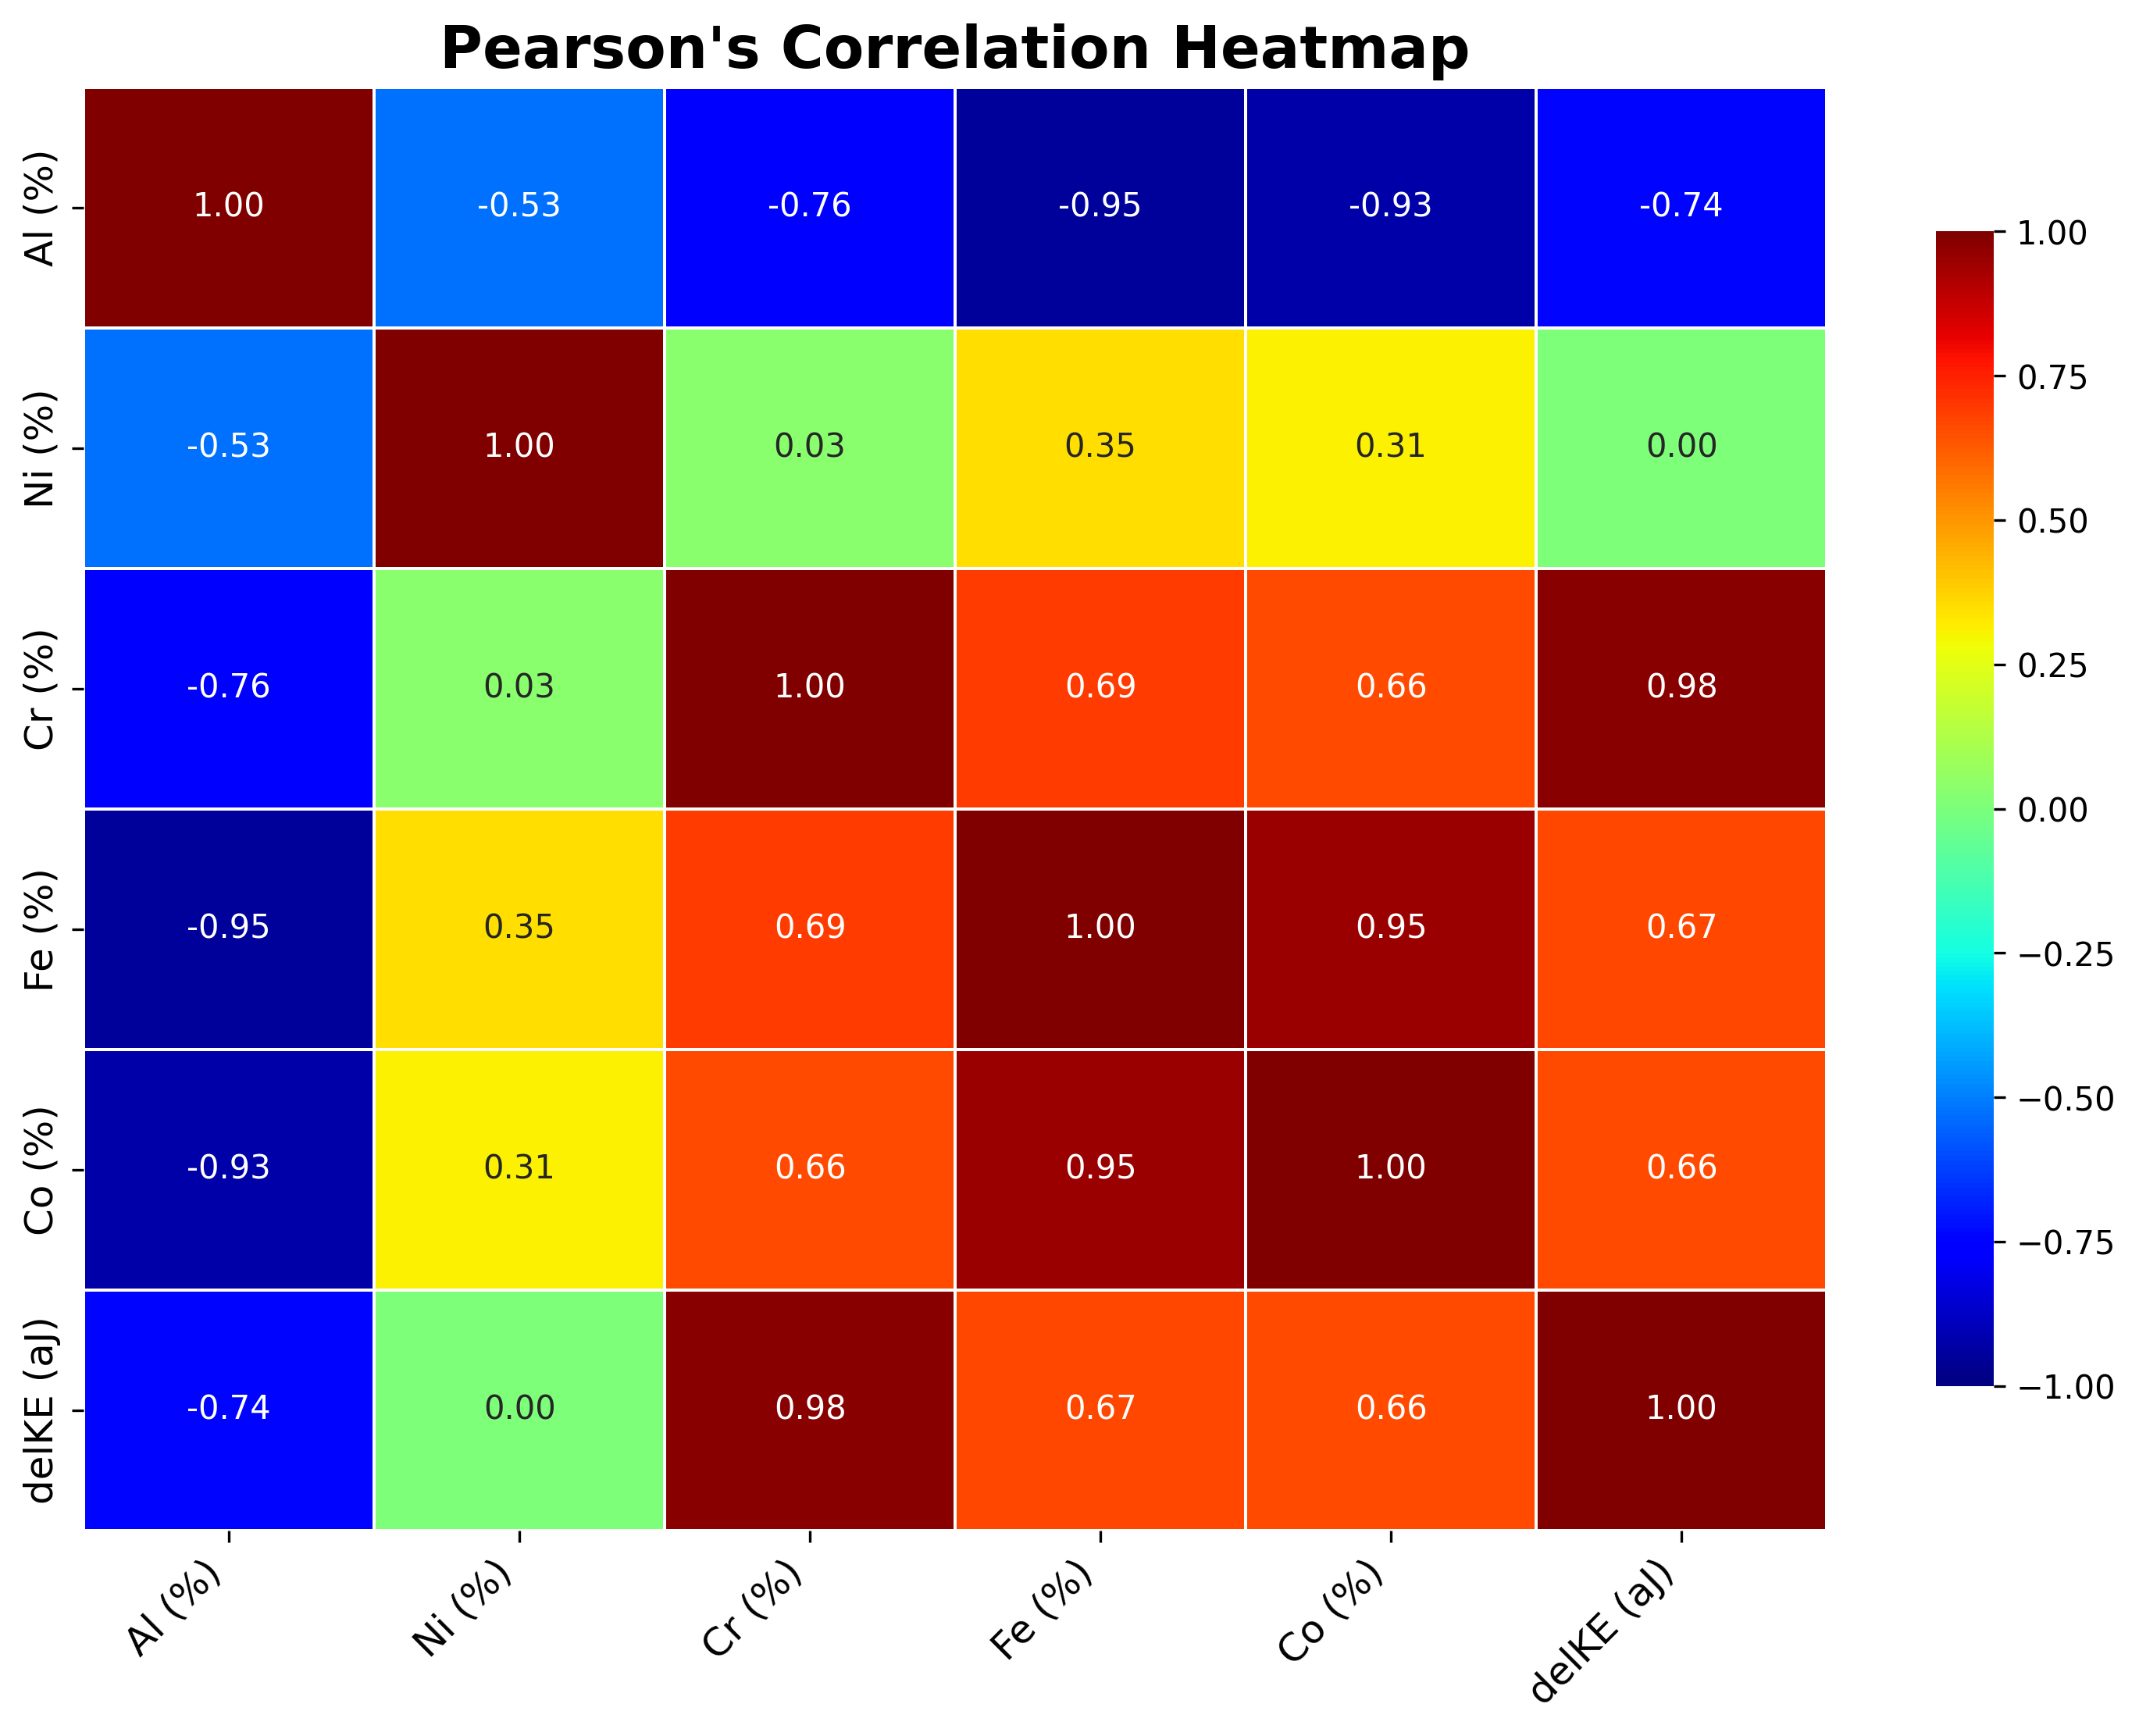

In [ ]:
# Pearson's Correlation Analysis
plt.figure(figsize=(12, 8), dpi=300)
corr_matrix = Xy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='jet', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, vmax=1.0, vmin=-1.0)
plt.title("Pearson's Correlation Heatmap", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.savefig("Pearson.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Split data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

# Transform input features
X_train_transformed = scaler.fit_transform(X_train) # Call fit_transform on the scaler instance
X_test_transformed = scaler.transform(X_test) # Call transform on the scaler instance

In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 40.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Initialize LazyRegressor
lazy_reg = LazyRegressor()

# Fit and evaluate models for y
y_models, y_preds = lazy_reg.fit(X_train_transformed, X_test_transformed, y_train, y_test)
print("Results for Fstrength:\n", y_models)

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
# Subplot for R2 and RMSE heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=300)
sns.heatmap(y_models[['R-Squared']], annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title("LazyPredict Model R2 Scores Heatmap", fontsize=16, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', labelsize=12)

sns.heatmap(y_models[['RMSE']], annot=True, cmap='Reds', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, ax=axes[1])
axes[1].set_title("LazyPredict Model RMSE Scores Heatmap", fontsize=16, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig("lazypredict_performance_heatmaps.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define a function to train and tune an XGBoost regressor model
def train_xgboost(X_train, Y_train):
    # Define a pipeline with feature scaling and XGBoost regressor
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('xgboost', XGBRegressor())
    ])

    # Define the hyperparameter grid for XGBoost
    param_grid = {
        'xgboost__n_estimators': [100, 200, 300],
        'xgboost__learning_rate': [0.01, 0.05, 0.1],
        'xgboost__max_depth': [3, 5, 7],
        'xgboost__subsample': [0.8, 1.0],
        'xgboost__colsample_bytree': [0.8, 1.0],
        'xgboost__gamma': [0, 0.1, 0.2]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    return grid_search.best_estimator_, grid_search.best_params_

In [ ]:
# Train and tune the GPR models
best_model, best_params = train_xgboost(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train.values.ravel(), cv=5, scoring='r2')

print("Best hyperparameters:", best_params)
print("5-fold CV R2 scores:", cv_scores)

In [ ]:
# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("R-squared (Train, Test):", r2_train, r2_test)
print("MSE (Train, Test):", mse_train, mse_test)

In [ ]:
# High-quality Regressor plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
axes[0].scatter(y_train, y_train_pred, label='Training Data', alpha=0.7, s=100)
axes[0].scatter(y_test, y_test_pred, label='Test Data', alpha=0.7, s=100)
axes[0].set_xlabel('Actual delKE', fontsize=18)
axes[0].set_ylabel('Predicted delKE', fontsize=18)
axes[0].set_title('XGBoost: Actual vs Predicted delKE', fontsize=18)
axes[0].legend(fontsize=18)
axes[0].grid(True)

# Relative error distribution
relative_error_train = (y_train - y_train_pred) / y_train
relative_error_test = (y_test - y_test_pred) / y_test


sns.kdeplot(relative_error_train, label='Training', fill=True, ax=axes[1])
sns.kdeplot(relative_error_test, label='Test', fill=True, ax=axes[1])
axes[1].set_xlabel('Relative Error', fontsize=18)
axes[1].set_ylabel('Density', fontsize=18)
axes[1].set_title('XGBoost: Distribution of Relative Errors', fontsize=18)
axes[1].legend(fontsize=18)
axes[1].grid(True)

plt.savefig("GPR_E.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define element names
elements = ['Al', 'Ni', 'Cr', 'Fe', 'Co']

# Define bounds
lower_bound = 5
upper_bound = 35
num_samples = 1000  # Number of random samples

# Generate compositions with sum = 100
samples = []
for _ in range(num_samples):
    while True:
        rand_vals = np.random.uniform(lower_bound, upper_bound, len(elements))  # Random values
        scale_factor = 100 / np.sum(rand_vals)  # Scale to sum to 100
        scaled_vals = rand_vals * scale_factor  # Adjust values

        # Ensure all values remain within [5, 35]
        if np.all(scaled_vals >= lower_bound) and np.all(scaled_vals <= upper_bound):
            samples.append(scaled_vals)
            break

# Convert to DataFrame
df_unknown = pd.DataFrame(samples, columns=elements)

# Display first few rows
print(df_unknown.head())

In [ ]:
#Normalizing df_unknown
X_train_all = np.concatenate((X_train,X_test),axis = 0)
y_train_all = np.concatenate((y_train,y_test),axis=0)

In [ ]:
scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all) ## fit and transform training data and
X_unknown_scaled  = scaler.transform(df_unknown) # transform test data
print('maximum value of the UTS in the experimental data:',y_train_all.max())

In [ ]:
import numpy as np
from scipy.stats import norm
def bootstrap_estimator(model, X_train, y_train, X_test, n_iter=100):
  bootstrap_preds = np.zeros([len(X_test), n_iter])
  index = np.arange(X_train.shape[0])
  np.random.seed(20)  # Fix seed for reproducibility
  for i in range(n_iter):
      index_sampled = np.random.choice(index, size=X_train.shape[0], replace=True)
        # Add small Gaussian noise to prevent identical predictions
        # Use array indexing instead of .iloc
      X_train_sample = X_train[index_sampled, :] + np.random.normal(0, 0.01, X_train.shape)
      y_train_sample = np.array(y_train)[index_sampled].reshape(-1, 1)
      model.fit(X_train_sample, y_train_sample.ravel())
      bootstrap_preds[:, i] = model.predict(X_test)
  return bootstrap_preds.mean(1), bootstrap_preds.std(1)
 # Expected Improvement function
def Expected_Improvement(X_test, X_train_all, y_train_all, model, xi=0.1):
  mu_x, sigma_x = bootstrap_estimator(model, X_train_all, y_train_all, X_test, n_iter=10000)
  epsilon = 1e-6  # Small offset to prevent division by zero
  sigma_x = np.where(sigma_x == 0, epsilon, sigma_x)
  mu_max = np.percentile(y_train_all, 95)  # Use 95th percentile instead of max
  diff = mu_x - mu_max - xi
  z = diff / sigma_x
  ei = np.where(sigma_x > 0, diff * norm.cdf(z) + sigma_x * norm.pdf(z), 0)
  return ei, mu_x, sigma_x

In [ ]:
# Run EI calculation
ei, predicted_property, std = Expected_Improvement(X_unknown_scaled, X_train_all_scaled, y_train_all, best_model, xi=0.1)

In [ ]:
# Create DataFrame
df_predict = pd.DataFrame({"ei": ei, "predicted_property": predicted_property, "std": std})

In [ ]:
# Save to CSV
df_predict.to_csv('ei_scores.csv', index=False)

In [ ]:
# Concatenate df_unknown and df_predict
df_concatenated = pd.concat([df_unknown, df_predict], axis=1)

# Display the first few rows of the concatenated DataFrame
#print(df_concatenated.head())

# Save the concatenated DataFrame to a CSV file (optional)
#df_concatenated.to_csv('concatenated_data.csv', index=False)


In [ ]:
# Sort results
df_predict_final_sorted = df_concatenated.sort_values('ei', ascending=False)
df_predict_final_sorted.to_csv('/content/ei_sorted.csv')

In [ ]:
# Display top results
print(df_predict_final_sorted.head(10))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Data for maximum Young's modulus (maximum density too, which we want to minimize)
max_y_MD = np.array([
    [8.7232589, 19.49859246, 23.92604955, 23.92604955, 23.92604955],
    [6.91892228, 22.17489515, 23.63539419, 23.63539419, 23.63539419],
    [17.67913476, 17.99719952, 24.69908649, 19.62563689, 19.99894234],
    [8.340940155, 19.00831183, 24.216916, 24.216916, 24.216916],
    [5.823946541, 20.9976843, 24.39278972, 24.39278972, 24.39278972],
    [9.977805346, 16.95335781, 24.35627895, 24.35627895, 24.35627895],
    [1.507575287, 24.36966882, 24.7075853, 24.7075853, 24.7075853],
    [0.773315457, 24.46037305, 24.92210383, 24.92210383, 24.92210383],
    [19.41668782, 18.61195072, 23.91652239, 19.2151303, 18.83970877],
    [9.964391481, 15.53648559, 24.83304098, 24.83304098, 24.83304098]
])

min_y_MD = np.array([
    [18.96324591, 20.62404551, 15.94001642, 21.7914484, 22.68124377],
    [34.72496187, 19.98159385, 15.09781476, 15.09781476, 15.09781476],
    [31.44680491, 22.44023565, 15.37098648, 15.37098648, 15.37098648],
    [34.15036409, 20.00293186, 15.28223468, 15.28223468, 15.28223468],
    [17.80763607, 20.75293307, 15.59155702, 22.49696846, 23.35090538],
    [30.40488847, 22.65343908, 15.64722415, 15.64722415, 15.64722415],
    [33.95738723, 18.45518091, 15.86247729, 15.86247729, 15.86247729],
    [36.13217285, 16.34958413, 15.83941434, 15.83941434, 15.83941434],
    [29.72077489, 22.35407064, 15.97505149, 15.97505149, 15.97505149],
    [17.11034402, 22.25460841, 16.45164617, 20.35444165, 23.82895975]
])

# Updated tradeoff solutions (5-dimensional vectors as per clarification)
BO_solutions = np.array([
    [19.12492054, 13.51249071, 25.4439041, 25.37051683, 16.54816783],
    [20.16064126, 8.25687924, 24.98380022, 29.9997871, 16.59889218],
    [9.546518116, 6.924095129, 29.42161351, 28.15262657, 25.95514668],
    [9.605278017, 12.01229982, 26.970137, 26.90290178, 24.50938338],
    [12.93510044, 6.02199724, 29.4295, 25.34833787, 26.26506445],
    [9.162807438, 7.987830592, 28.22113862, 27.69957529, 26.92864806],
    [12.90788475, 9.98420576, 29.1426423, 25.12073076, 22.84453643],
    [13.65491013, 11.97184552, 25.79243653, 24.91692751, 23.66388032],
    [22.47881375, 5.307040111, 26.42437402, 25.17349179, 20.61628033],
    [12.48569664, 8.969647239, 29.9919563, 26.66610906, 21.88659076]
])

# Combine all the data into one dataset
all_data = np.vstack([max_y_MD, min_y_MD, BO_solutions])

# Normalize the data using StandardScaler
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)

# Apply t-SNE with a lower perplexity value
tsne = TSNE(n_components=2, perplexity=8, random_state=42)
tsne_results = tsne.fit_transform(all_data_scaled)

# Prepare labels for each group for better visualization
labels = ['max_y_MD'] * len(max_y_MD) + \
         ['min_y_MD'] * len(max_y_MD) + \
         ['BO_solutions'] * len(BO_solutions)

# Create a DataFrame for better handling of the data
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Label'] = labels

# Plot the t-SNE result
plt.figure(figsize=(10, 8), dpi=300)  # Set figure size and DPI for high-quality output
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=pd.Categorical(tsne_df['Label']).codes, cmap='viridis', s=100, alpha=0.7)

# Add title and labels with larger font sizes for readability
plt.title('t-SNE of Solutions for Multi-Objective Optimization', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)

# Add a legend with larger font size
plt.legend(handles=scatter.legend_elements()[0], labels=sorted(tsne_df['Label'].unique()), fontsize=12)

# Save the figure with a high resolution (300 DPI)
plt.savefig('tsne_plot_high_quality.png', format='png', dpi=300)

# Show plot
plt.show()